# Kaggle Titanic Dataset

## 데이터 세부사항 (Data description)

- passengerid
    - 탑승자 아이디  
- survive
    - 사망 : 0
    - 생존 : 1
- pclass
    - 1등석 : 1
    - 2등석 : 2
    - 3등석 : 3
- name
    - 탑승자 이름  
- gender
    - male : 남성
    - female : 여성  
- age
    - 나이  
- sibsp
    - 타이타닉 호에 동승한 자매/배우자의 수  
- parch
    - 타이타닉 호에 동승한 부모/자식의 수  
- ticket
    - 티켓 번호  
- fare
    - 승객 요금  
- cabin
    - 방 호수  
- embarked
    - 탑승지
    - 셰르부르 : C
    - 퀴즈타운 : Q
    - 사우샘프턴 : S

# 전역 변수 설정 (Global Variables)

## Import Library

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Set dataset path

In [2]:
import easydict
import json
args = easydict.EasyDict()

# Dataset 기본 디렉토리 경로 설정
args.default_path = '/Users/jhnam/workspace/playdata/encore21titanic/'

# get train and test dataset path
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'

# get submission path
args.submission_csv = args.default_path+"submission.csv"

# 데이터 분석을 위한 변수들
# random state seed 설정
args.random_state = 21

# 데이터셋 불러오기 (Load Titanic Dataset)

## read csv file for pandas

In [3]:
org_train = pd.read_csv(args.train_csv)
org_test = pd.read_csv(args.test_csv)

# 데이터 셋 확인 (Check Dataset)

## train

In [4]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [5]:
print(f"{org_train.shape}")

org_train.head()

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [6]:
print(f"org_train total count : {org_train.shape[0]}")

org_train.nunique()

org_train total count : 916


passengerid    916
survived         2
pclass           3
name           915
gender           2
age             92
sibsp            7
parch            8
ticket         703
fare           251
cabin          146
embarked         3
dtype: int64

In [7]:
org_train['passengerid'].nunique(), org_train.shape[0]

(916, 916)

> passengerid 의 고유값의 개수가 org_train 의 총 개수와 같다.  
> 따라서, 모든 값이 고유하므로 제거해준다.  

In [8]:
print(f"before : {org_train.shape}")

# passengerid drop
org_train.drop('passengerid', axis=1, inplace=True)

print(f"after : {org_train.shape}")

before : (916, 12)
after : (916, 11)


## test

In [9]:
org_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  393 non-null    int64  
 1   pclass       393 non-null    int64  
 2   name         393 non-null    object 
 3   gender       393 non-null    object 
 4   age          310 non-null    float64
 5   sibsp        393 non-null    int64  
 6   parch        393 non-null    int64  
 7   ticket       393 non-null    object 
 8   fare         392 non-null    float64
 9   cabin        97 non-null     object 
 10  embarked     392 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 33.9+ KB


In [10]:
print(f"{org_test.shape}")

org_test.head()

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [11]:
print(f"org_test total count : {org_test.shape[0]}")

org_test.nunique()

org_test total count : 393


passengerid    393
pclass           3
name           393
gender           2
age             75
sibsp            7
parch            7
ticket         345
fare           168
cabin           86
embarked         3
dtype: int64

> passengerid 의 고유값의 개수가 org_test 의 총 개수와 같다.  
> 하지만 test 의 데이터에서 이후 passengerid 의 값으로 submission 해야하므로 index 로 설정해준다.  

In [12]:
org_test.set_index(['passengerid'], inplace=True)

In [13]:
print(f"{org_test.shape}")

org_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## 타겟 데이터 확인

In [14]:
org_train.shape, org_test.shape

((916, 11), (393, 10))

In [15]:
target = pd.Categorical(org_train['survived'])
target = target.rename_categories(['Died', 'Survived'])

target.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


> 타겟 데이터를 확인해보면 생존률은 37% 인 것을 확인할 수 있다.

# EDA

## 데이터셋 확인

In [18]:
org_train.shape, org_test.shape

((916, 11), (393, 10))

In [16]:
org_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [17]:
org_test.head()

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


## 수치형 데이터 분석

### 수치형 데이터 확인

In [19]:
df_number = org_train.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   age       736 non-null    float64
 3   sibsp     916 non-null    int64  
 4   parch     916 non-null    int64  
 5   fare      916 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.1 KB


In [20]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  916 non-null    int64  
 1   pclass    916 non-null    int64  
 2   age       736 non-null    float64
 3   sibsp     916 non-null    int64  
 4   parch     916 non-null    int64  
 5   fare      916 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.1 KB


### 통계적 분석

In [21]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,736.000000,916.000000,916.000000,916.000000
mean,0.377729,2.292576,29.698370,0.507642,0.361354,32.402710
std,0.485084,0.838675,14.185627,1.044866,0.828054,50.506411
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


> survived, pclass 는 수치형 데이터지만 특정된 값만을 가지고 있다.

#### survived

> survived 는 0과 1로 이루어진 범주형 데이터인 것으로 확인된다.

In [22]:
df_number['survived'].unique()

array([0, 1])

#### pclass

> pclass 는 1, 2, 3 으로 이루어진 범주형 데이터 인것으로 확인된다.

In [23]:
df_number['pclass'].unique()

array([2, 3, 1])

#### age

In [25]:
df_number['age'].unique()

array([  nan, 52.  , 27.  , 44.  , 41.  , 28.5 , 32.  , 24.  , 54.  ,
       18.  , 30.  , 50.  , 51.  , 61.  , 23.  , 10.  , 20.  , 25.  ,
       16.  , 22.  , 19.  , 26.  ,  9.  , 29.  , 36.  , 39.  , 34.  ,
       28.  , 22.5 , 58.  , 60.  , 53.  , 21.  ,  8.  , 33.  , 45.  ,
       17.  , 74.  ,  2.  , 35.  , 40.  ,  7.  ,  1.  , 47.  , 49.  ,
       11.  , 31.  , 15.  , 37.  , 43.  , 64.  , 63.  , 48.  , 62.  ,
       42.  ,  0.33, 14.  ,  6.  ,  5.  , 38.  ,  0.75, 70.  , 55.  ,
       59.  , 66.  ,  3.  , 36.5 , 46.  , 71.  , 57.  , 11.5 , 18.5 ,
        4.  , 34.5 , 32.5 , 38.5 , 65.  ,  0.83, 13.  , 26.5 , 12.  ,
        0.17, 45.5 , 30.5 , 14.5 , 24.5 , 70.5 , 80.  , 20.5 ,  0.67,
       40.5 , 76.  ,  0.92])

In [112]:
df_number['age'].nunique()

92

In [26]:
print("** df_number - age 통계적 분석 **")
print()
print(f"총 합계 : {df_number['age'].sum()}")
print(f"평균 : {df_number['age'].mean()}")
print(f"중앙값 : {df_number['age'].median()}")
print(f"분산 : {df_number['age'].var()}")
print(f"표준편차 : {df_number['age'].std()}")
print(f"최솟값 : {df_number['age'].min()}")
print(f"최댓값 : {df_number['age'].max()}")
print(f"분위수 계산\n{df_number['age'].quantile([0.25, 0.5, 0.75])}")

** df_number - age 통계적 분석 **

총 합계 : 21858.0
평균 : 29.69836956521739
중앙값 : 28.0
분산 : 201.23202237207926
표준편차 : 14.185627316833022
최솟값 : 0.17
최댓값 : 80.0
분위수 계산
0.25    21.0
0.50    28.0
0.75    38.0
Name: age, dtype: float64


#### fare

In [108]:
df_number['fare'].unique()[:10]

array([12.875 ,  7.75  , 93.5   ,  7.7958, 26.    , 20.2125,  7.2292,
       13.    ,  8.05  , 81.8583])

In [113]:
df_number['fare'].nunique()

251

In [109]:
print("** df_number - age 통계적 분석 **")
print()
print(f"총 합계 : {df_number['fare'].sum()}")
print(f"평균 : {df_number['fare'].mean()}")
print(f"중앙값 : {df_number['fare'].median()}")
print(f"분산 : {df_number['fare'].var()}")
print(f"표준편차 : {df_number['fare'].std()}")
print(f"최솟값 : {df_number['fare'].min()}")
print(f"최댓값 : {df_number['fare'].max()}")
print(f"분위수 계산\n{df_number['fare'].quantile([0.25, 0.5, 0.75])}")

** df_number - age 통계적 분석 **

총 합계 : 29680.8828
평균 : 32.40271048034934
중앙값 : 14.4583
분산 : 2550.8975053926765
표준편차 : 50.506410537600836
최솟값 : 0.0
최댓값 : 512.3292
분위수 계산
0.25     7.8958
0.50    14.4583
0.75    30.0177
Name: fare, dtype: float64


#### sibsp

> sibsp 는 고유값이 상대적으로 적지만 범주형 데이터라고 보기에는 어렵다.

In [32]:
df_number['sibsp'].unique()

array([0, 1, 8, 5, 3, 2, 4])

In [39]:
df_number.groupby('sibsp').describe().T

sibsp                    0           1           2           3          4  \
survived count  621.000000  222.000000   30.000000   17.000000  16.000000   
         mean     0.333333    0.531532    0.433333    0.235294   0.125000   
         std      0.471785    0.500132    0.504007    0.437237   0.341565   
         min      0.000000    0.000000    0.000000    0.000000   0.000000   
         25%      0.000000    0.000000    0.000000    0.000000   0.000000   
         50%      0.000000    1.000000    0.000000    0.000000   0.000000   
         75%      1.000000    1.000000    1.000000    0.000000   0.000000   
         max      1.000000    1.000000    1.000000    1.000000   1.000000   
pclass   count  621.000000  222.000000   30.000000   17.000000  16.000000   
         mean     2.344605    2.027027    2.400000    2.588235   3.000000   
         std      0.821343    0.866255    0.770132    0.795206   0.000000   
         min      1.000000    1.000000    1.000000    1.000000   3.000000   
         25%      2.000000    1.000000    2.000000    3.000000   3.000000   
         50%      3.000000    2.000000    3.000000    3.000000   3.000000   
         75%      3.000000    3.000000    3.000000    3.000000   3.000000   
         max      3.000000    3.000000    3.000000    3.000000   3.000000   
age      count  480.000000  195.000000   26.000000   14.000000  16.000000   
         mean    30.812479   30.959026   23.326923   16.357143   9.187500   
         std     12.840049   15.749765   13.203554   12.401037   8.765225   
         min      0.330000    0.170000    0.750000    2.000000   1.000000   
         25%     22.000000   20.500000   18.000000    4.500000   4.750000   
         50%     28.000000   30.000000   22.500000   14.500000   7.500000   
         75%     38.000000   42.000000   25.500000   28.750000  10.250000   
         max     80.000000   76.000000   55.000000   33.000000  38.000000   
parch    count  621.000000  222.000000   30.000000   17.000000  16.000000   
         mean     0.162641    0.675676    0.533333    1.176471   1.500000   
         std      0.563075    1.146801    0.860366    0.727607   0.516398   
         min      0.000000    0.000000    0.000000    0.000000   1.000000   
         25%      0.000000    0.000000    0.000000    1.000000   1.000000   
         50%      0.000000    0.000000    0.000000    1.000000   1.500000   
         75%      0.000000    1.000000    1.000000    2.000000   2.000000   
         max      5.000000    9.000000    3.000000    2.000000   2.000000   
fare     count  621.000000  222.000000   30.000000   17.000000  16.000000   
         mean    25.067357   47.450545   45.066943   65.310300  32.053125   
         std     48.707656   47.037403   62.891362   94.390623   7.790244   
         min      0.000000    6.437500    7.925000   15.850000   7.775000   
         25%      7.795800   16.100000   18.187500   21.075000  30.737500   
         50%      9.500000   26.000000   23.250000   25.466700  31.331250   
         75%     26.000000   64.043750   34.375000   27.900000  39.687500   
         max    512.329200  262.375000  262.375000  263.000000  39.687500   

sibsp                   5          8  
survived count   4.000000   6.000000  
         mean    0.250000   0.166667  
         std     0.500000   0.408248  
         min     0.000000   0.000000  
         25%     0.000000   0.000000  
         50%     0.000000   0.000000  
         75%     0.250000   0.000000  
         max     1.000000   1.000000  
pclass   count   4.000000   6.000000  
         mean    3.000000   3.000000  
         std     0.000000   0.000000  
         min     3.000000   3.000000  
         25%     3.000000   3.000000  
         50%     3.000000   3.000000  
         75%     3.000000   3.000000  
         max     3.000000   3.000000  
age      count   4.000000   1.000000  
         mean    8.500000  14.500000  
         std     5.446712        NaN  
         min     1.000000  14.500000  
         25%     7.0000

#### parch

> parch 는 고유값이 상대적으로 적지만 범주형 데이터라고 보기에는 어렵다.

In [31]:
df_number['parch'].unique()

array([0, 1, 2, 3, 4, 6, 5, 9])

In [38]:
df_number.groupby('parch').describe().T

parch                    0           1           2           3          4  \
survived count  709.000000  121.000000   70.000000    6.000000   4.000000   
         mean     0.346968    0.487603    0.500000    0.500000   0.250000   
         std      0.476341    0.501925    0.503610    0.547723   0.500000   
         min      0.000000    0.000000    0.000000    0.000000   0.000000   
         25%      0.000000    0.000000    0.000000    0.000000   0.000000   
         50%      0.000000    0.000000    0.500000    0.500000   0.000000   
         75%      1.000000    1.000000    1.000000    1.000000   0.250000   
         max      1.000000    1.000000    1.000000    1.000000   1.000000   
pclass   count  709.000000  121.000000   70.000000    6.000000   4.000000   
         mean     2.283498    2.256198    2.371429    2.000000   3.000000   
         std      0.842059    0.841912    0.819534    0.894427   0.000000   
         min      1.000000    1.000000    1.000000    1.000000   3.000000   
         25%      1.000000    1.000000    2.000000    1.250000   3.000000   
         50%      3.000000    3.000000    3.000000    2.000000   3.000000   
         75%      3.000000    3.000000    3.000000    2.750000   3.000000   
         max      3.000000    3.000000    3.000000    3.000000   3.000000   
age      count  550.000000  113.000000   59.000000    6.000000   3.000000   
         mean    31.966364   23.046460   18.750000   41.833333  38.000000   
         std     12.340688   17.187343   14.938371   17.758566   8.185353   
         min     11.000000    0.670000    0.170000   16.000000  29.000000   
         25%     23.000000    7.000000    7.500000   30.000000  34.500000   
         50%     29.000000   21.000000   15.000000   48.000000  40.000000   
         75%     39.000000   36.000000   27.500000   52.500000  42.500000   
         max     80.000000   70.000000   64.000000   61.000000  45.000000   
sibsp    count  709.000000  121.000000   70.000000    6.000000   4.000000   
         mean     0.249647    1.082645    2.057143    1.166667   0.500000   
         std      0.519143    1.092297    2.419041    0.408248   0.577350   
         min      0.000000    0.000000    0.000000    1.000000   0.000000   
         25%      0.000000    0.000000    0.000000    1.000000   0.000000   
         50%      0.000000    1.000000    1.000000    1.000000   0.500000   
         75%      0.000000    1.000000    3.750000    1.000000   1.000000   
         max      3.000000    4.000000    8.000000    2.000000   1.000000   
fare     count  709.000000  121.000000   70.000000    6.000000   4.000000   
         mean    27.058468   43.902169   59.758929  105.875000  25.585425   
         std     43.893355   62.713113   66.079927  121.382067   3.218309   
         min      0.000000    3.170800    7.229200   18.750000  21.075000   
         25%      7.854200   15.245800   23.450000   25.843750  24.368775   
         50%     10.500000   25.466700   31.275000   34.375000  26.683350   
         75%     26.550000   39.687500   69.550000  205.375000  27.900000   
         max    512.329200  512.329200  263.000000  262.375000  27.900000   

parch                   5         6      9  
survived count   3.000000   2.00000   1.00  
         mean    0.333333   0.00000   1.00  
         std     0.577350   0.00000    NaN  
         min     0.000000   0.00000   1.00  
         25%     0.000000   0.00000   1.00  
         50%     0.000000   0.00000   1.00  
         75%     0.500000   0.00000   1.00  
         max     1.000000   0.00000   1.00  
pclass   count   3.000000   2.00000   1.00  
         mean    3.000000   3.00000   3.00  
         std     0.000000   0.00000    NaN  
         min     3.000000   3.00000   3.00  
         25%     3.000000   3.00000   3.00  
         50%     3.000000   3.00000   3.00  
         75%     3.000000   3.00000   3.00  
         max     3.000000   3.00000   3.00  
age      count   3.000000   2.00000   0.00  
         mean   39.333333  41.50

### 왜도

데이터 분포의 비대칭도를 나타내는 통계량  
분포가 오른쪽으로 치우쳐져 있고 왼쪽으로 긴 꼬리를 가지는 경우 왜도는 음수  
분포가 왼쪽으로 치우쳐져 있고 오른쪽으로 긴 꼬리를 가지는 경우 왜도는 양수  
정규 분포와 같이 좌우 대칭인 경우 왜도는 0에 가까워진다.

skewness 해석  
- 0.5 ~ 0.5 : 상당히 대칭적  
- -1 ~ -0.5 또는 0.5 ~ 1 : 적당히 치우침  
- -1 보다 적거나 1 보다 큰 경우 : 상당히 치우침

#### fare

fare 의 왜도는 4.6 으로 많이 치우친 것으로 볼 수 있다.

In [43]:
df_number['fare'].skew()

4.6645177836905765

In [40]:
df_number['fare'].mean(), df_number['fare'].median(), df_number['fare'].mode().values[0]

(32.40271048034934, 14.4583, 13.0)

<Axes: ylabel='Frequency'>

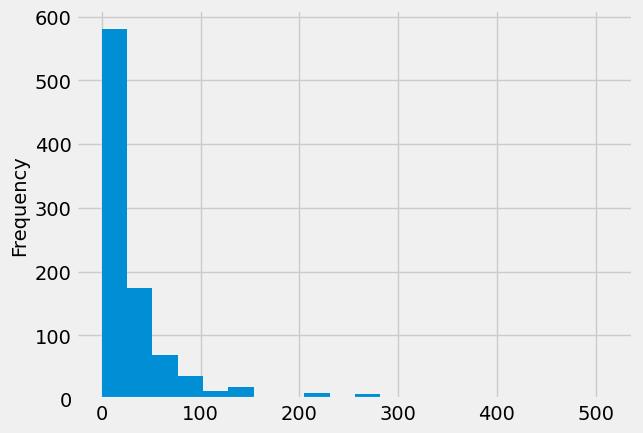

In [41]:
df_number['fare'].plot.hist(bins=20)

<Axes: >

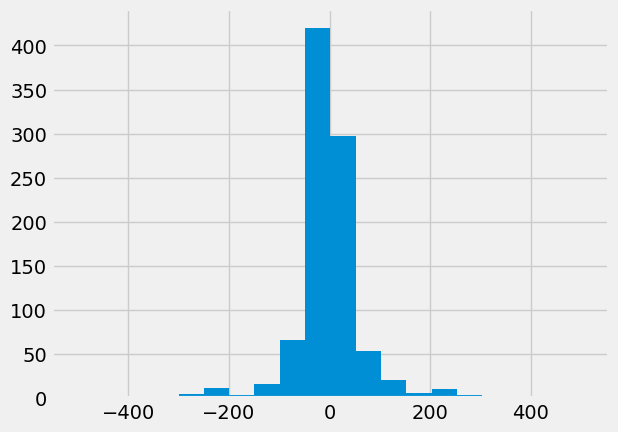

In [42]:
df_number['fare'].diff().hist(bins=20)

#### age

age 의 왜도는 0.46 으로 상당히 대칭적인 것으로 확인된다. 

In [44]:
df_number['age'].skew()

0.4663303747733262

In [45]:
df_number['age'].mean(), df_number['age'].median(), df_number['age'].mode().values[0]

(29.69836956521739, 28.0, 24.0)

<Axes: ylabel='Frequency'>

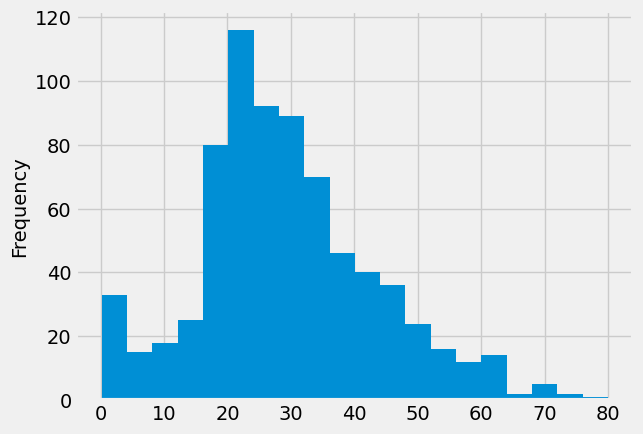

In [46]:
df_number['age'].plot.hist(bins=20)

<Axes: >

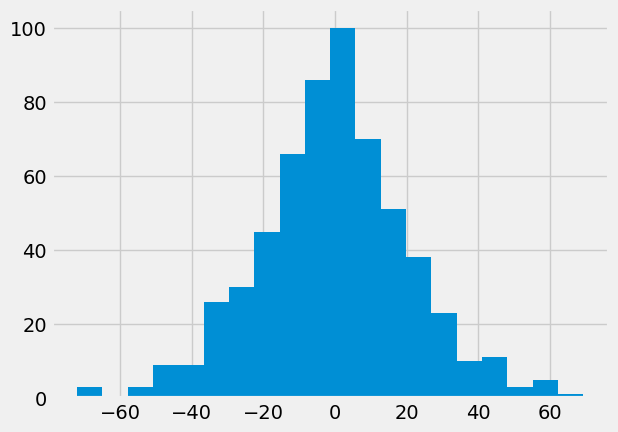

In [47]:
df_number['age'].diff().hist(bins=20)

### 첨도

- kurtosis 해석
  - Mesokurtic(kurtosis=3): 정규 분포와 유사한 첨도 통계량이다.
  - Leptokurtic(kurtosis>3): 피크는 Mesokurtic보다 높고 날카롭기 때문에 데이터는 꼬리가 무겁거나 특이치(outlier)가 많다는 것을 의미한다.
  - Platykurtic(kurtosis<3): 피크는 Mesokurtic보다 낮고 넓으며, 이는 데이터가 가벼운 편이나 특이치(outlier)가 부족하다는 것을 의미한다. 


- 활률 분포의 뽀족한 정도를 나타내는 지표
- 관측치들이 얼마나 집중적으로 중심에 몰려있는지 측정 시 사용
- kurt 값이 0보다 작을 경우에는 정규분포보다 더 완만하고 납작한 분포를 가진다.
- kurt 값이 0보다 크면 정규분포보다 더 뽀족한 분포를 가진다.

#### fare

fare 는 Leptokutic 으로 매우 높고 날카로운 것으로 확인되고 특이치가 많은 것을 알 수 있다.  

In [50]:
df_number['fare'].kurt()

31.16578434563386

<Axes: ylabel='Frequency'>

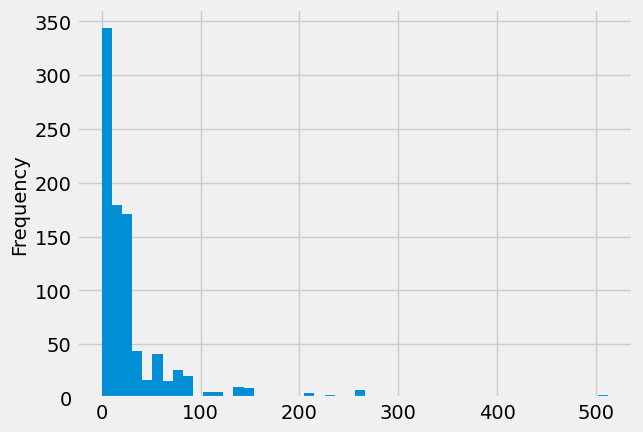

In [52]:
df_number['fare'].plot.hist(bins=50)

<Axes: >

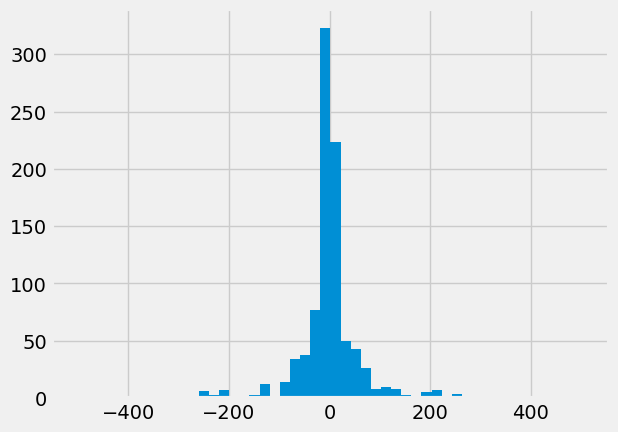

In [53]:
# diff(): 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.
df_number['fare'].diff().hist(bins=50)

#### age

age 의 첨도는 0.41 로 데이터는 가벼운 편이고 특이치가 부족한 것을 알 수 있다.  

In [51]:
df_number['age'].kurt()

0.414327458430233

<Axes: ylabel='Frequency'>

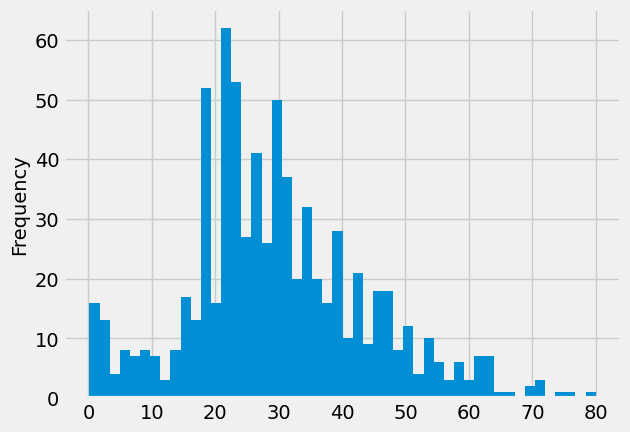

In [54]:
df_number['age'].plot.hist(bins=50)

<Axes: >

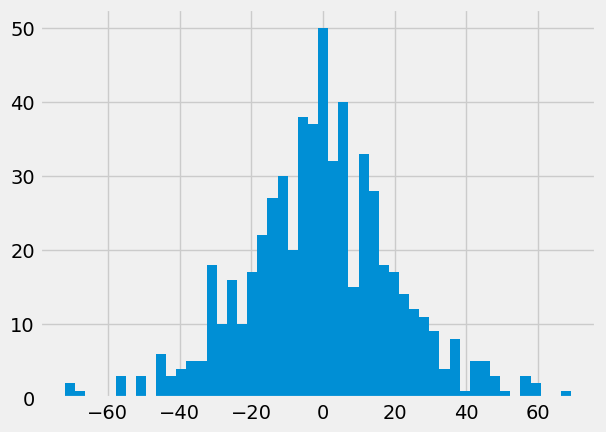

In [56]:
df_number['age'].diff().hist(bins=50)

### 이상치 분석

데이터 분석을 할 때, 평균이나 표준편차를 많이 사용한다.  
이런 경우 데이터에 이상치가 있으면 왜곡된 의미를 전달할 가능성이 높다.  
그래서 이상치가 있는지를 확인할 필요가 있고, 박스플롯을 활용하면 이상치가 얼마나 포함되어 있는지를 쉽게 판단할 수 있다.

#### age

<Axes: ylabel='age'>

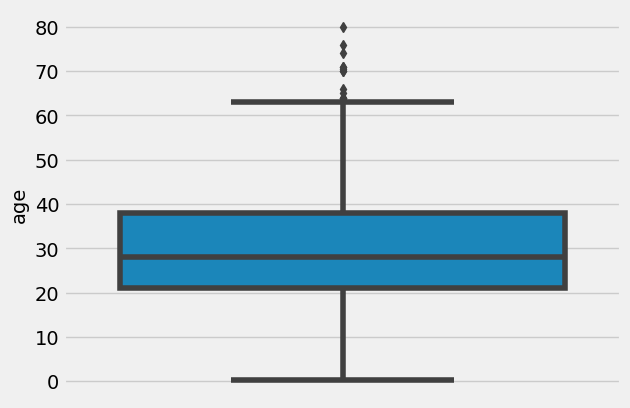

In [57]:
sns.boxplot(y=df_number['age'], data=org_train)

<Axes: xlabel='survived', ylabel='age'>

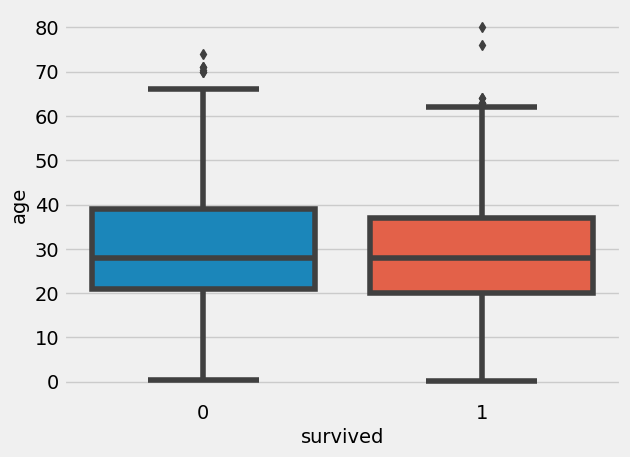

In [59]:
sns.boxplot(x=df_number['survived'], y=df_number['age'], data=df_number)

### 상관관계 분석

#### heatmap 분석

heatmap 분석 방법  

- 주로 수치형 데이터를 분석할 때 사용한다.  


- corr() 함수는 Pearson Correlation Coefficient 를 구하는 함수  
  보통 절댓값이 0.4 이상이면 상관 관계를 갖는다고 본다.


- annot=True  
  직접적인 수치를 확인할 수 있다.
  

- mask 설정을 통해 반만 잘라서 확인할 수 있다.  


- 두 상관 관계가 높다는 것이고 서로 영향을 준다는 의미일 뿐  
  하나가 증가하면 반드시 다른 하나가 증가하는 것은 아니다.  

In [60]:
df_number.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.250455,-0.030330,0.002924,0.084269,0.224068
pclass,-0.250455,1.000000,-0.407876,0.069781,0.060049,-0.541277
age,-0.030330,-0.407876,1.000000,-0.255825,-0.169893,0.139101
sibsp,0.002924,0.069781,-0.255825,1.000000,0.386491,0.162144
parch,0.084269,0.060049,-0.169893,0.386491,1.000000,0.181826
fare,0.224068,-0.541277,0.139101,0.162144,0.181826,1.000000


<Axes: >

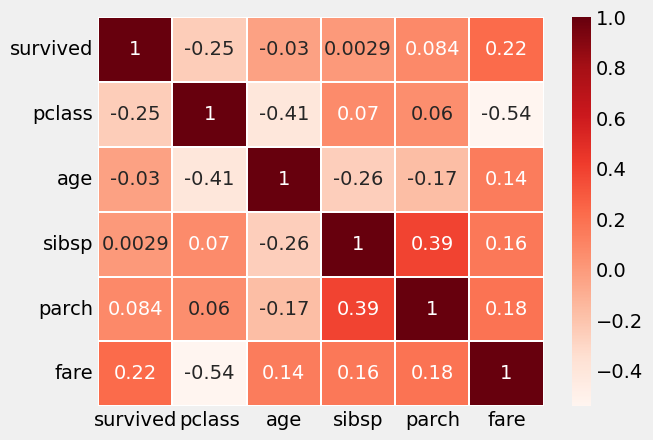

In [64]:
sns.heatmap(df_number.corr(), annot=True, linewidths=0.2, cmap = "Reds")

<Axes: >

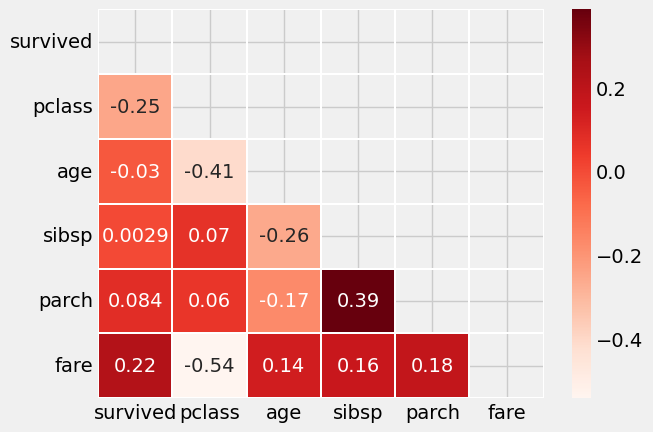

In [65]:
mask=np.zeros_like(df_number.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_number.corr(), annot=True, mask=mask, linewidths=0.2, cmap = "Reds")

<Axes: >

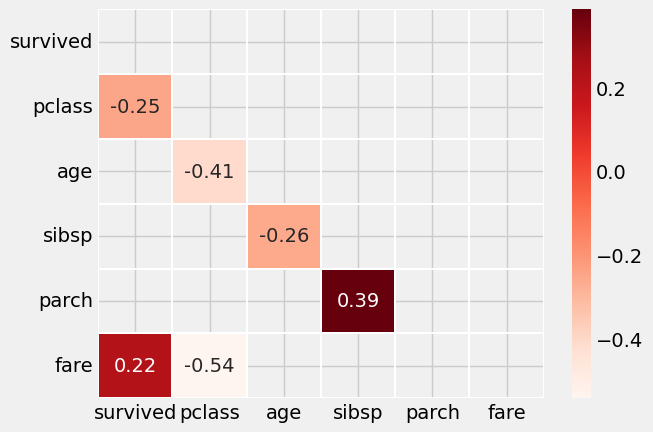

In [66]:
corr = df_number.corr()
mask=np.zeros_like(df_number.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr[((corr >= 0.2) | (corr <= -0.2)) & (corr != 1)], mask=mask,annot=True, linewidths=0.2, cmap = "Reds")

### 수치형 데이터 분석 정리

***통계적 분석***

통계적 분석을 통해, survived, pclass 는 수치형으로 된 범주형 데이터인 것으로 확인된다.  
그 외 age 는 92개의 고유값을 가지고 있고 fare 는 251개의 고유값을 가지고 있었다.  

***왜도와 첨도***

fare 의 왜도는 4.6 으로 많이 치우친 것으로 볼 수 있다.  
age 의 왜도는 0.46 으로 상당히 대칭적인 것으로 확인된다.  

fare 는 Leptokutic 으로 매우 높고 날카로운 것으로 확인되고 특이치가 많은 것을 알 수 있다.  
age 의 첨도는 0.41 로 데이터는 가벼운 편이고 특이치가 부족한 것을 알 수 있다.  

왜도와 첨도를 분석한 후 어떻게 적용해야하는지에 대해서는 잘 모르겠다.  

***이상치 분석***

age 의 이상치를 분석해보니 이상치가 있는 것으로 확인되었다.  

***상관 관계***

상관 관계를 통해 확인할 수 있는 부분  

- pclass 와 survived 의 관계
- pcalss 와 age 의 관계
- sibsp 와 parch 의 관계
- sibsp 와 age 의 관계

## 범주형 데이터 분석

### 범주형 데이터 확인

In [69]:
df_object = org_train.select_dtypes(exclude=np.number)

# survived 추가
df_object = df_object.join(df_number['survived']) 

# 데이터 타입 변경
df_object['survived'] = df_object['survived'].astype('object') 

df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      916 non-null    object
 1   gender    916 non-null    object
 2   ticket    916 non-null    object
 3   cabin     198 non-null    object
 4   embarked  915 non-null    object
 5   survived  916 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [70]:
df_object.head()

,name,gender,ticket,cabin,embarked,survived
0,"Wheeler, Mr. Edwin Frederick""""",male,SC/PARIS 2159,NaN,S,0
1,"Henry, Miss. Delia",female,382649,NaN,Q,0
2,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,12749,B69,S,1
3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,350043,NaN,S,1
4,"Hold, Mr. Stephen",male,26707,NaN,S,0


### 통계적 분석

#### 고유값 확인

In [74]:
for cols in df_object.columns:
     # 고유값 개수
    print(f"{cols} 고유값 수 = {df_object[cols].nunique()}")

name 고유값 수 = 915
gender 고유값 수 = 2
ticket 고유값 수 = 703
cabin 고유값 수 = 146
embarked 고유값 수 = 3
survived 고유값 수 = 2


#### gender

In [77]:
df_object['gender'].unique()

array(['male', 'female'], dtype=object)

In [102]:
df_object['gender'].mode().values[0]

'male'

In [103]:
# 범주별 비율
df_object["gender"].value_counts(normalize=True) 

male      0.643013
female    0.356987
Name: gender, dtype: float64

In [105]:
df_object['gender'].value_counts()

male      589
female    327
Name: gender, dtype: int64

In [106]:
df_object.loc[df_object['gender'].isnull()]

,name,gender,ticket,cabin,embarked,survived


#### embarked

승선 장소

In [79]:
df_object['embarked'].unique()

array(['S', 'Q', 'C', nan], dtype=object)

In [84]:
df_object['embarked'].mode().values[0]

'S'

In [85]:
df_object['embarked'].value_counts()

S    645
C    189
Q     81
Name: embarked, dtype: int64

In [100]:
df_object.loc[df_object['embarked'].isnull()]

,name,gender,ticket,cabin,embarked,survived
387,"Icard, Miss. Amelie",female,113572,B28,NaN,1


In [101]:
# 범주별 비율
df_object["embarked"].value_counts(normalize=True) 

S    0.704918
C    0.206557
Q    0.088525
Name: embarked, dtype: float64

#### survived

In [121]:
df_object['survived'].unique()

array([0, 1], dtype=object)

In [123]:
df_object['survived'].value_counts(normalize=True)

0    0.622271
1    0.377729
Name: survived, dtype: float64

#### ticket

티켓 내용

In [116]:
df_object['ticket'].nunique()

703

In [124]:
df_object['ticket'].value_counts(normalize=True)

CA. 2343              0.007642
3101295               0.007642
1601                  0.007642
S.O.C. 14879          0.006550
CA 2144               0.006550
                        ...   
350052                0.001092
SOTON/O.Q. 3101306    0.001092
330968                0.001092
370373                0.001092
PC 17606              0.001092
Name: ticket, Length: 703, dtype: float64

#### cabin

객실 위치

In [119]:
df_object['cabin'].unique()[:10]

array([nan, 'B69', 'A34', 'D28', 'B96 B98', 'B37', 'C54', 'D20', 'D9',
       'A11'], dtype=object)

In [117]:
df_object['cabin'].nunique()

146

#### name

In [125]:
df_object['name'].nunique()

915

In [157]:
df_object['title'] = df_object['name'].str.extract('([A-Za-z]+)\.')
    
df_object['title'].value_counts()

Mr          528
Miss        185
Mrs         138
Master       42
Rev           6
Dr            5
Col           3
Major         2
Don           1
Ms            1
Jonkheer      1
Mlle          1
Countess      1
Capt          1
Sir           1
Name: title, dtype: int64

In [158]:
df_object['title'] = df_object['title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [159]:
df_object['title'].value_counts()

Mr        528
Miss      185
Mrs       138
Master     42
Other      23
Name: title, dtype: int64

### 교차 분석

pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
- index: 행으로 그룹화할 값
- columns: 열로 그룹화할 값
- rownames: 행 이름
- colnames: 열 이름
- values: 두 행/열에 따라 집계할 값(반드시 aggfunc와 함께 사용)
- aggfunc: 집계 함수(mean, sum 등)
- margins: True인 경우, 행/열의 소계값이 함게 산출
- dropna: NaN을 포함하지 않고 반환(디폴트: True)
- normalize: 개수가 아닌 비율로 표시
  - index: 행을 기준으로 비율 표시
  - columns: 열을 기준으로 비율 표시
  - all: 전체 기준으로 비율 표시

#### survived & embarked

In [133]:
pd.crosstab(df_object["survived"],df_object["embarked"],margins = True)

embarked,C,Q,S,All
survived,,,,
0,97,41,432,570
1,92,40,213,345
All,189,81,645,915


In [136]:
pd.crosstab(df_object["survived"],df_object["embarked"],margins = True, normalize="all")

embarked,C,Q,S,All
survived,,,,
0,0.106011,0.044809,0.472131,0.622951
1,0.100546,0.043716,0.232787,0.377049
All,0.206557,0.088525,0.704918,1.000000


#### survived & gender

In [131]:
pd.crosstab(df_object["survived"],df_object["gender"],margins = True)

gender,female,male,All
survived,,,
0,54,516,570
1,273,73,346
All,327,589,916


In [137]:
pd.crosstab(df_object["survived"],df_object["gender"],margins = True, normalize="all")

gender,female,male,All
survived,,,
0,0.058952,0.563319,0.622271
1,0.298035,0.079694,0.377729
All,0.356987,0.643013,1.000000


Text(0.5, 1.0, 'Survived by Gender')

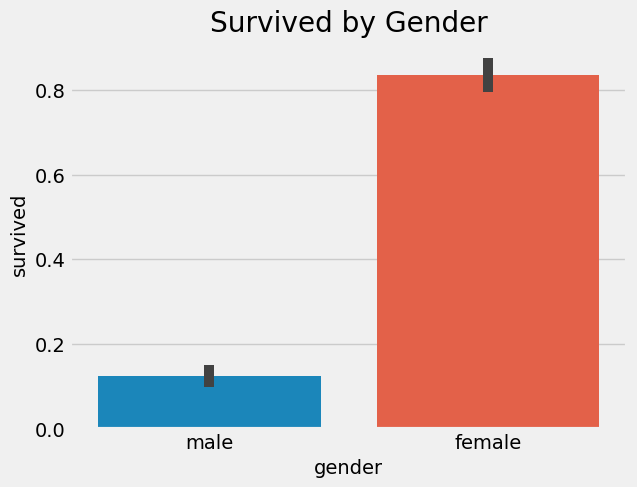

In [155]:
sbp = sns.barplot(x = "gender", y = "survived", data = df_object)
sbp.set_title("Survived by Gender")

Text(0.5, 1.0, 'Survived passenger under age 21')

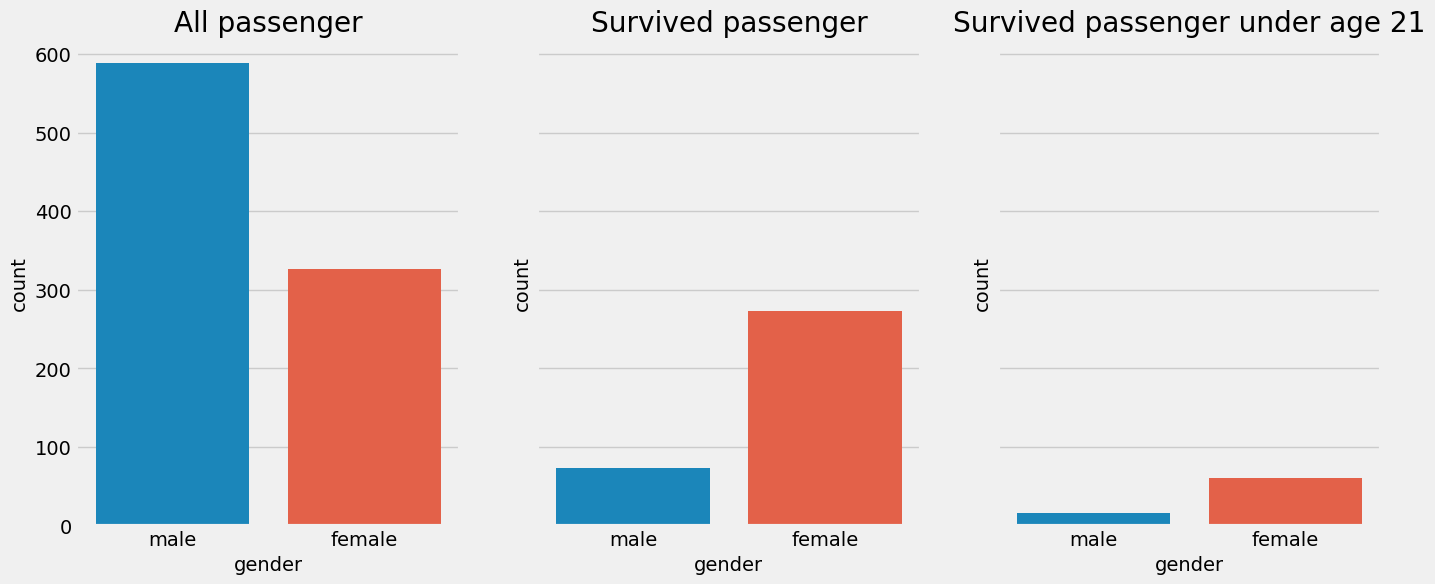

In [156]:
fig, ax =plt.subplots(1,3 , figsize=(15, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'gender' , data= df_object , ax = ax[0] , order=['male' , 'female'])
b = sns.countplot(x = 'gender' , data= df_object[df_object['survived'] == 1] , ax = ax[1] , order=['male' , 'female'])
c = sns.countplot(x = 'gender' , data= df_object[ ((df_number['age'] < 21) & (df_object['survived'] == 1)) ] , order=['male' , 'female'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
ax[2].set_title('Survived passenger under age 21')

#### survived & title

In [161]:
pd.crosstab(df_object["title"],df_object["survived"],margins=True, normalize= "all")

survived,0,1,All
title,,,
Master,0.032751,0.013100,0.045852
Miss,0.039301,0.162664,0.201965
Mr,0.513100,0.063319,0.576419
Mrs,0.019651,0.131004,0.150655
Other,0.017467,0.007642,0.025109
All,0.622271,0.377729,1.000000


<Axes: xlabel='title', ylabel='Count'>

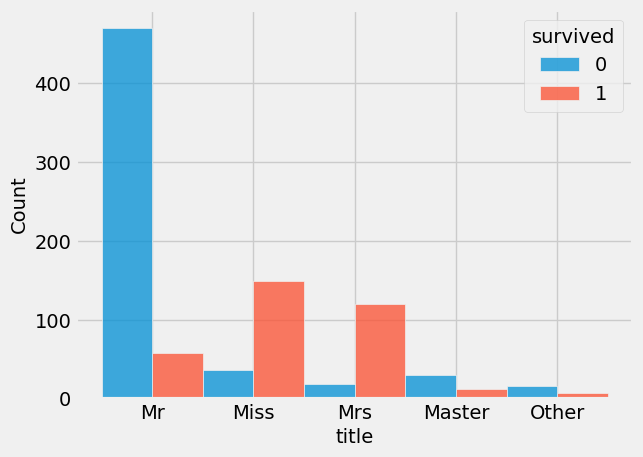

In [165]:
sns.histplot(x = "title", hue = "survived", data = df_object, multiple="dodge")

#### cabin & embakrd

In [142]:
pd.crosstab(df_object["cabin"],df_object["embarked"],margins = True).T

cabin,A10,A11,A18,A19,A20,A21,A23,A24,A29,A31,...,F,F E46,F E57,F E69,F G63,F2,F33,G6,T,All
embarked,,,,,,,,,,,,,,,,,,,,,
C,1,1,1,0,1,0,0,0,1,1,...,0,1,1,1,0,0,0,0,0,83
Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
S,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,1,4,3,4,1,111
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,4,3,4,1,197


#### cabin & gender

In [141]:
pd.crosstab(df_object["cabin"],df_object["gender"],margins = True).T

cabin,A10,A11,A18,A19,A20,A21,A23,A24,A29,A31,...,F,F E46,F E57,F E69,F G63,F2,F33,G6,T,All
gender,,,,,,,,,,,,,,,,,,,,,
female,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,3,4,0,94
male,1,0,1,1,1,1,1,1,0,1,...,1,1,1,0,1,4,0,0,1,104
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,4,3,4,1,198


#### embarked & gender

In [144]:
pd.crosstab(df_object["embarked"],df_object["gender"],margins = True)

gender,female,male,All
embarked,,,
C,77,112,189
Q,43,38,81
S,206,439,645
All,326,589,915


### 범주형 데이터 분석 정리

***통계적 분석***

범주형 데이터의 고유값의 수는 다음과 같다. 

name 고유값 수 = 915  
gender 고유값 수 = 2  
ticket 고유값 수 = 703  
cabin 고유값 수 = 146  
embarked 고유값 수 = 3  
survived 고유값 수 = 2  

gender 는 male 과 female 의 값을 가지고 있고  
female 의 성별을 가진 사람보다 male 의 성별을 가진 사람이 더 많은 것으로 보이고  
남성과 여성의 비율은 64.3:35.6 의 비율을 가지고 있다.  

embarked 는 S, C, Q 의 값을 가지고 있고  
S 에서 승선한 사람이 많은 것으로 보인다.  
각 값의 비율은 70.4 : 20.6 : 0.08 의 비율을 가지고 있다.  

survived 는 0 과 1의 값을 가지고 있고 62.2 : 37.7 의 비율을 가지고 있다.  

cabin 은 객실 위치에 대한 값을 가지고 있어 값의 첫 문자를 확인해보면 머무른 객실의 위치를 확인할 수 있다.  

name, ticket 은 각각의 고유값을 가지고 있기 때문에 분석이 어렵다.  

***교차 분석***

- survived 와 gender 의 교차 분석 한 결과  
    embarked 의 경우 70% 이상의 사람이 'S' 에서 승선했고 생존률이 더 낮은 것을 확인할 수 있다.  

- survived 와 embarked 의 교차 분석 한 결과  
    gender 의 경우 male 의 성별을 가진 사람의 생존률이 더 낮을 것을 확인할 수 있다.  

- embarked 와 gender 의 교차 분석 한 결과  
    'S' 에서 승선한 남자의 비율이 높은 것을 확인할 수 있다.  


# Split train and test

# Training Model